# Tabela para análise

## Imports necessários

In [1]:
import numpy as np
%pylab inline
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Obtenção de dados dos arquivo CSV

In [2]:
from sqlalchemy import create_engine
import pandas as pd
dados=pd.read_csv("dados/alunosBD_P2.csv",sep=',')

In [40]:
dados.head(10)

,Aluno,Nota1,Nota2P,Nota3,Situacao
0,aluno01,28.00,6.650,27.0,Aprovado
1,aluno02,26.25,22.050,11.0,Reprovado
2,aluno03,33.25,25.725,25.5,Aprovado
3,aluno04,0.00,0.000,0.0,Reprovado
4,aluno05,26.25,28.000,24.0,Aprovado
5,aluno06,0.00,0.000,0.0,Reprovado
6,aluno07,26.25,17.850,24.0,Aprovado
7,aluno08,31.50,25.725,24.0,Aprovado
8,aluno09,29.75,15.225,22.5,Aprovado
9,aluno10,33.25,15.225,12.0,Aprovado


### Atributos preditivos X atributo de Classe

In [41]:
dados.columns

Index([u'Aluno', u'Nota1', u'Nota2P', u'Nota3', u'Situacao'], dtype='object')


Atributos preditivos (x):
1. Nota1
2. Nota2P
3. Nota3

Atributo Classe (y):
1. Situacao

Neste tipo de abordagem, o algoritmo classificador aprenderá como uma base de dados previamente existente. Com base neste aprendizado poderá classificar novos dados

Qual a probabilidae de um cliente gastar 1000 ou mais para realizar uma compra.

In [5]:
#total de valores na amostra
print((dados.count())['Aluno']) 

38


### 1. Condição A: Situacao = 'Aprovado'

Temos:
    * P(A)  = (Aprovados)/ (total da amostra)
    * P(A)  = (29)/(38) 
    * P(A)  = 76,31

In [42]:
P_A=(float((dados[dados.Situacao=='Aprovado'].count())['Aluno'])/float(((dados.count())['Aluno'])))*100
P_A

76.31578947368422

### Probabilidade de um cliente gastar muito (A) dado que possui 40 anos ou mais (B)

P(A|B) = probabilidade de um cliente gastar muito dado que possui 40 anos ou mais.

    Condição A: (Situacao = “Aprovado”).
    Condição B: (Nota2P = “>=80”).

Temos:
    1. Calculamos primeiro a segunda condiçao (B) onde obtivemos 7 elementos
    
    2. Agora vamos calcular a condição A com base nos valores obtidos em B

### Consulta com filtro via pandas

In [44]:
nota2p_maiorig_20=dados[dados.Nota2P>=20]
nota2p_maiorig_20.head()

,Aluno,Nota1,Nota2P,Nota3,Situacao
1,aluno02,26.25,22.050,11.0,Reprovado
2,aluno03,33.25,25.725,25.5,Aprovado
4,aluno05,26.25,28.000,24.0,Aprovado
7,aluno08,31.50,25.725,24.0,Aprovado
12,aluno13,28.00,20.125,27.0,Aprovado


In [45]:
#qtd obtida
(nota2p_maiorig_20.count())['Aluno']

19

In [46]:
nota2p_maiorig_20_aprovados=nota2p_maiorig_20[nota2p_maiorig_20.Situacao=='Aprovado']

### Total de registros retornados com nota2P maior que 20 que foram aprovados

In [49]:
(nota2p_maiorig_20_aprovados.count())['Aluno']

17

## Probabilidade das pessoas com nota2P maior que 20 serem pessoas que foram aprovadas

Então Temos: 
        
    
    * P(A|B)  = (Situaca = "Aprovado") / (nota2P >20)
    * P(A|B)  = (17)/(19) 
    * P(A|B)  = 89,47%

In [54]:
(float(((nota2p_maiorig_20_aprovados.count())['Aluno']))/float(((nota2p_maiorig_20.count())['Aluno'])))*100

89.47368421052632

## Conclusão

Neste exemplo, obtivemos a probabilidade condicional de A dado B, representada por P(A|B). Para calcular esta probabilidade, levamos em consideração apenas o grupo de clientes com idade igual ou superior a 40 anos. São exatamente sete clientes (clientes de Id’s 1, 3, 5, 7, 8, 9 e 11, destacados na Tabela 2). Dentre estes sete clientes, observe que apenas três gastaram muito (clientes de Id’s 3, 5 e 8). Assim obtivemos P(A|B) = 3/7 = 42,86%. A conclusão é que, considerando os clientes mais velhos, uma parcela bem menor gasta muito nas compras (diminui de 53,33%, considerando todos os clientes, para 42,86%, considerando apenas os mais velhos).

<br><br><br><br>

### Definindo atributos preditios e atributo de classe

In [55]:
dados.head()

,Aluno,Nota1,Nota2P,Nota3,Situacao
0,aluno01,28.00,6.650,27.0,Aprovado
1,aluno02,26.25,22.050,11.0,Reprovado
2,aluno03,33.25,25.725,25.5,Aprovado
3,aluno04,0.00,0.000,0.0,Reprovado
4,aluno05,26.25,28.000,24.0,Aprovado


## Treinando somente com os primeiros 28 registros de informações

In [58]:
atributos_preditivos_x=dados[['Nota1','Nota2P','Nota3']].head(28)
atributos_classe_y=dados['Situacao'].head(28)

In [59]:
atributos_classe_y.head(5)

0     Aprovado
1    Reprovado
2     Aprovado
3    Reprovado
4     Aprovado
Name: Situacao, dtype: object

In [60]:
atributos_preditivos_x.head(5)

,Nota1,Nota2P,Nota3
0,28.00,6.650,27.0
1,26.25,22.050,11.0
2,33.25,25.725,25.5
3,0.00,0.000,0.0
4,26.25,28.000,24.0


reference: http://stackoverflow.com/questions/27117773/pandas-replace-values

1. P (A|B) =  probabilidade de um aluno ser aprovado, dado que ele tem pontos 20 ou mais na nota2P.
2. P (A|B) = (filtrar B, Filtrar A)
3. P (A|B) = (Idade>=40 --> 7 pessoas), (Gastam muito entre os 7 anteriores = 3)
4. P(A|B) ==> 3/7 ==> 42,86%

In [39]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(atributos_preditivos_x,atributos_classe_y)

GaussianNB(priors=None)

In [18]:
clf.class_prior_

array([ 0.71428571,  0.28571429])

In [19]:
clf.class_count_

array([ 20.,   8.])

In [20]:
clf.classes_

array(['Aprovado', 'Reprovado'], 
      dtype='|S9')

In [21]:
x=clf.classes_
x

array(['Aprovado', 'Reprovado'], 
      dtype='|S9')

In [22]:
clf.theta_

array([[ 29.26875 ,  20.8975  ,  22.9     ],
       [ 16.96875 ,  11.921875,  11.84375 ]])

In [23]:
accuracy=clf.score(atributos_preditivos_x,atributos_classe_y)
accuracy

0.8571428571428571

In [26]:
atributos_preditivos_x.head(5)

,Nota1,Nota2P,Nota3
0,28.00,6.650,27.0
1,26.25,22.050,11.0
2,33.25,25.725,25.5
3,0.00,0.000,0.0
4,26.25,28.000,24.0


In [27]:
atributos_preditivos_x.mean()

Nota1     25.754464
Nota2P    18.333036
Nota3     19.741071
dtype: float64

In [32]:
test_features=atributos_preditivos_x.tail(10)
test_label = atributos_classe_y.tail(10)

In [33]:
print(test_label)
print(test_features)

18     Aprovado
19     Aprovado
20     Aprovado
21     Aprovado
22     Aprovado
23     Aprovado
24    Reprovado
25     Aprovado
26    Reprovado
27     Aprovado
Name: Situacao, dtype: object
     Nota1  Nota2P  Nota3
18  26.250  16.450  28.50
19  28.000  17.000  25.50
20  13.000  28.000  24.00
21  31.500  25.725  24.00
22  28.000  30.275  25.50
23  22.500  27.000  20.00
24  21.250  18.000  18.75
25  21.875  22.000  21.25
26  22.500  17.250  10.00
27  22.500  27.500  21.25


In [34]:
pred = clf.predict(test_features)
print(pred)

['Aprovado' 'Aprovado' 'Aprovado' 'Aprovado' 'Aprovado' 'Aprovado'
 'Aprovado' 'Aprovado' 'Reprovado' 'Aprovado']


In [36]:
accuracy_teste = clf.score(test_features,test_label)
accuracy_teste

0.90000000000000002

In [30]:
atributos_preditivos_x.describe()

,Nota1,Nota2P,Nota3
count,28.000000,28.000000,28.000000
mean,25.754464,18.333036,19.741071
std,11.800840,8.583932,7.841155
min,0.000000,0.000000,0.000000
25%,22.343750,15.225000,17.062500
50%,26.250000,17.850000,22.500000
75%,29.750000,25.725000,24.375000
max,68.000000,30.975000,28.500000


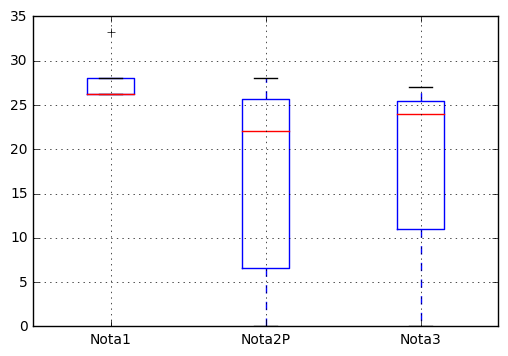

In [31]:
atributos_preditivos_x.head().boxplot()

Reference: 
1. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
1. http://www.devmedia.com.br/naive-bayes-mineracao-de-dados-na-pratica-revista-sql-magazine-110/27490
2. https://www.analyticsvidhya.com/blog/2015/09/naive-bayes-explained/